<a href="https://colab.research.google.com/github/Himanshukunar/excelr-assignments/blob/main/Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
file_path = "/content/heart_disease.xlsx"
df = pd.read_excel(file_path, sheet_name="Heart_disease")
print(df.head())


   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


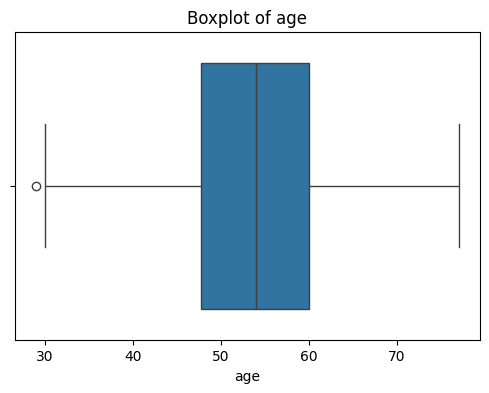

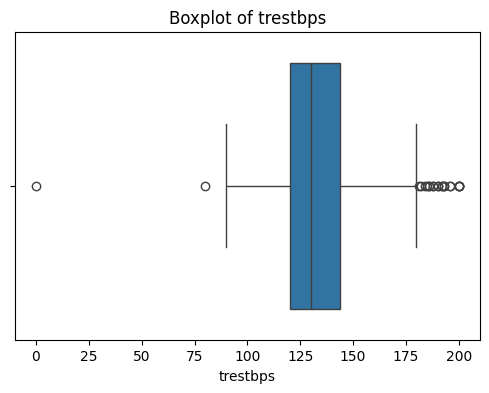

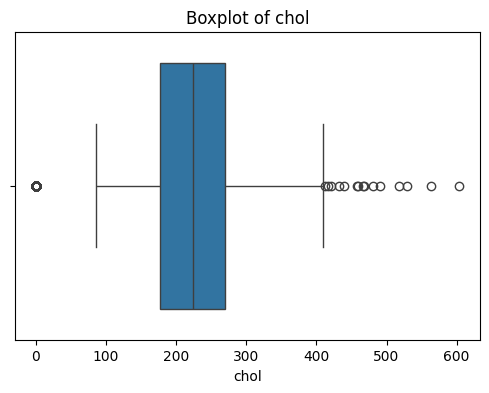

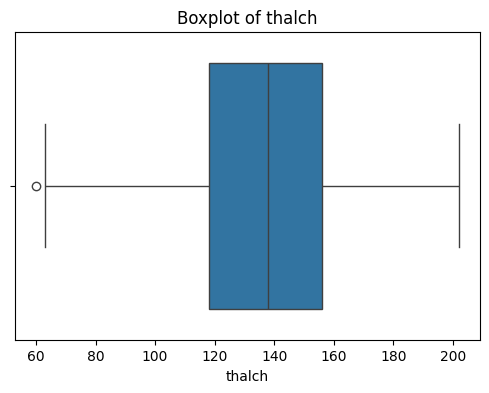

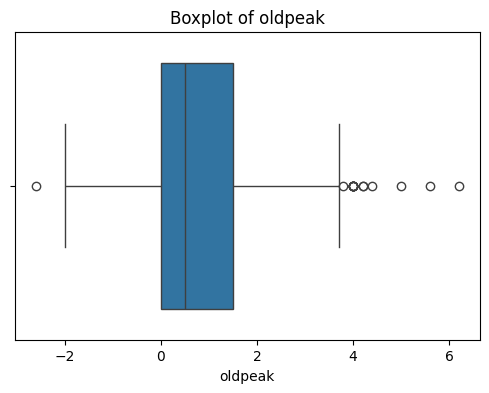

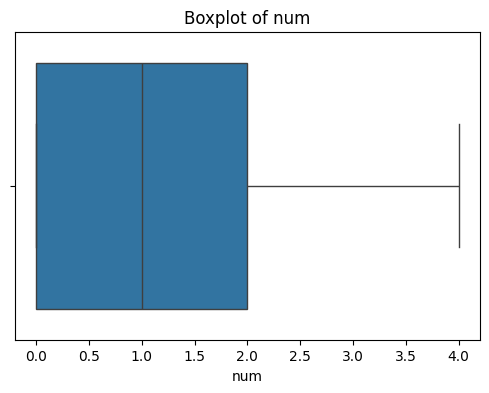

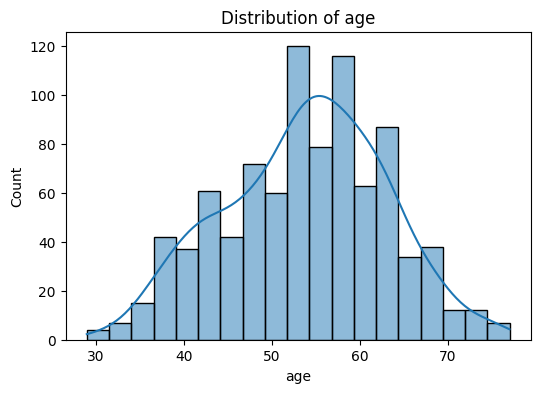

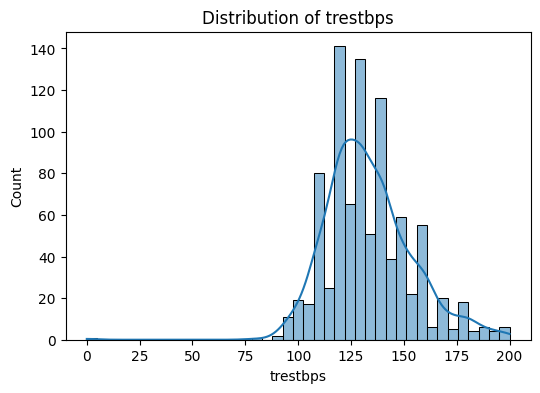

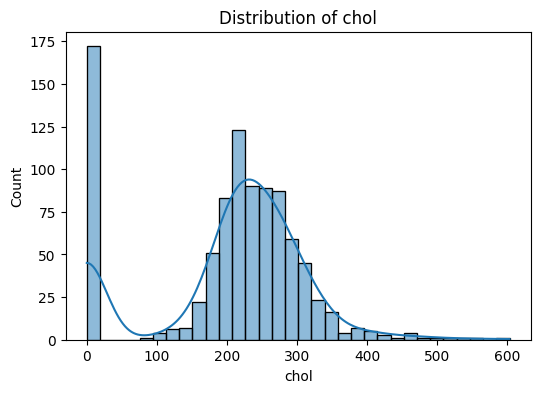

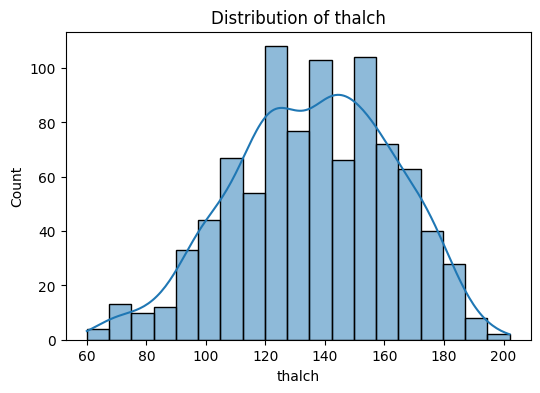

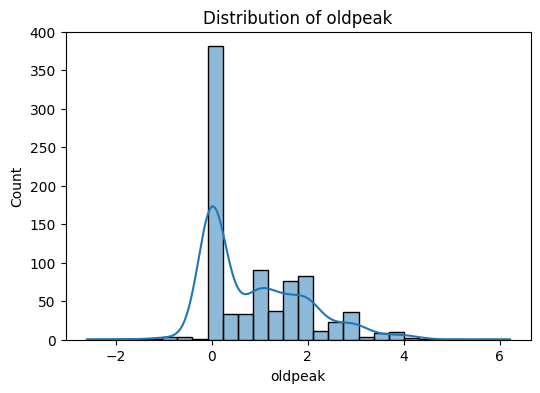

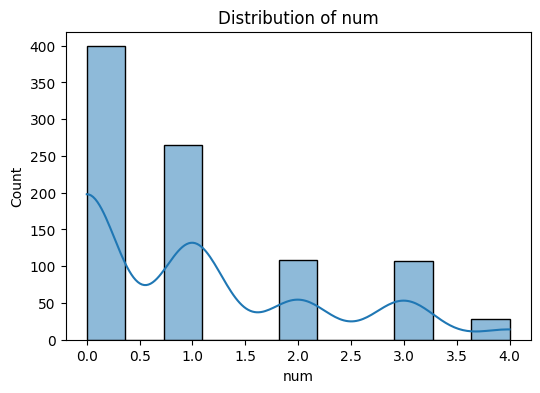

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
print(df.isnull().sum())
print(df.describe())
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation matrix - This will be done after encoding categorical variables
# plt.figure(figsize=(10,8))
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

        age  sex  cp  trestbps      chol    fbs  restecg    thalch  exang  \
0  1.052849    1   3  0.652591  0.271960   True        0  0.501387      0   
1 -1.366364    1   1  0.132633  0.003114  False        1 -0.201922      0   
2  0.393064    1   0  0.392612 -0.095463  False        1  0.423242      0   
3 -0.156758    1   3 -0.751298 -0.149232  False        0  2.064297      0   
4  0.393064    1   0 -1.167265 -0.014809  False        1 -0.436358      1   

    oldpeak  slope  thal  num  
0  1.288612      0     0    0  
1 -0.815249      1     0    0  
2 -0.449360      1     0    0  
3 -0.815249      1     0    0  
4  0.556834      1     0    0  


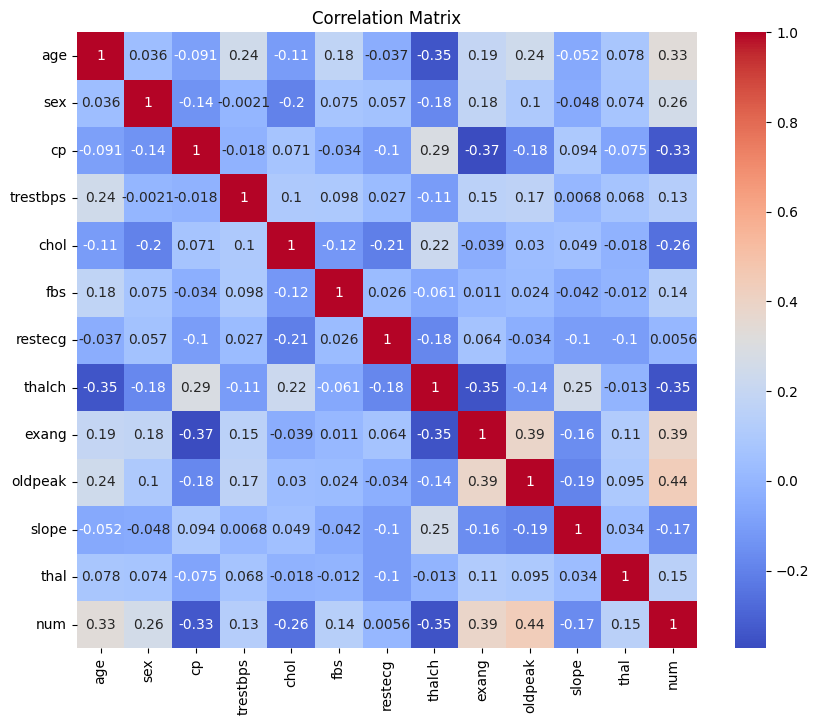

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
df = df.dropna()
df['exang'] = df['exang'].astype(str)
df['exang'] = df['exang'].map({'True': True, 'False': False, 'TRUE': True, 'FALSE': False})
df['exang'] = df['exang'].fillna(False).astype(int)

categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


print(df.head())

plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")

df['exang'] = df['exang'].map({'True': True, 'False': False, 'TRUE': True, 'FALSE': False})
df['exang'] = df['exang'].fillna(False).astype(int)
df['fbs'] = df['fbs'].astype(int)


categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df.drop(columns=['num'])
y = df['num'].apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Decision Tree Classification Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Decision Tree Classification Performance:
Accuracy: 0.7235
Precision: 0.7216
Recall: 0.7778
F1-score: 0.7487
ROC-AUC: 0.7201

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        80
           1       0.72      0.78      0.75        90

    accuracy                           0.72       170
   macro avg       0.72      0.72      0.72       170
weighted avg       0.72      0.72      0.72       170



/tmp/ipython-input-3662941720.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(False).astype(int)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
df = df.dropna()

df['exang'] = df['exang'].map({'True': True, 'False': False, 'TRUE': True, 'FALSE': False})
df['exang'] = df['exang'].fillna(False).astype(int)

# Convert 'fbs' to integer (True=1, False=0)
df['fbs'] = df['fbs'].astype(int)

categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scaling numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


X = df.drop(columns=['num'])
y = df['num'].apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best estimator to predict on test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Evaluate test accuracy
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy of Best Model:", test_accuracy)

/tmp/ipython-input-676667289.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(False).astype(int)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best Cross-Validation Accuracy: 0.791437908496732
Test Set Accuracy of Best Model: 0.7823529411764706


Decision Tree Performance on Test Set:
Accuracy: 0.7824
Precision: 0.7912
Recall: 0.8000
F1-score: 0.7956
ROC-AUC: 0.8313

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77        80
           1       0.79      0.80      0.80        90

    accuracy                           0.78       170
   macro avg       0.78      0.78      0.78       170
weighted avg       0.78      0.78      0.78       170



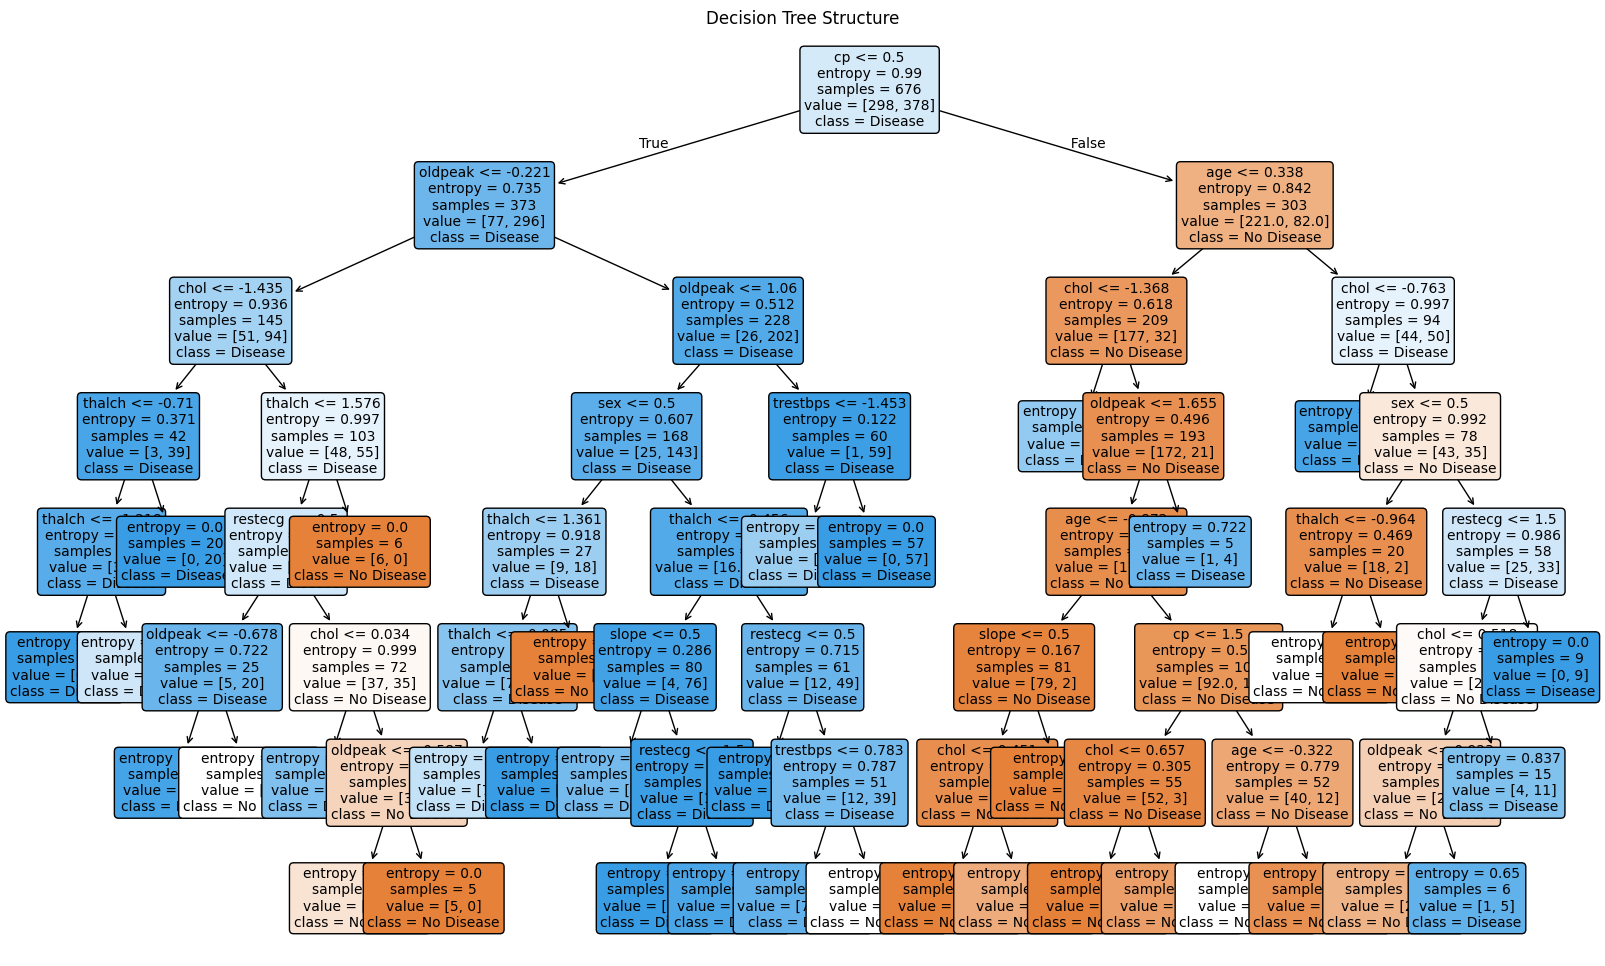

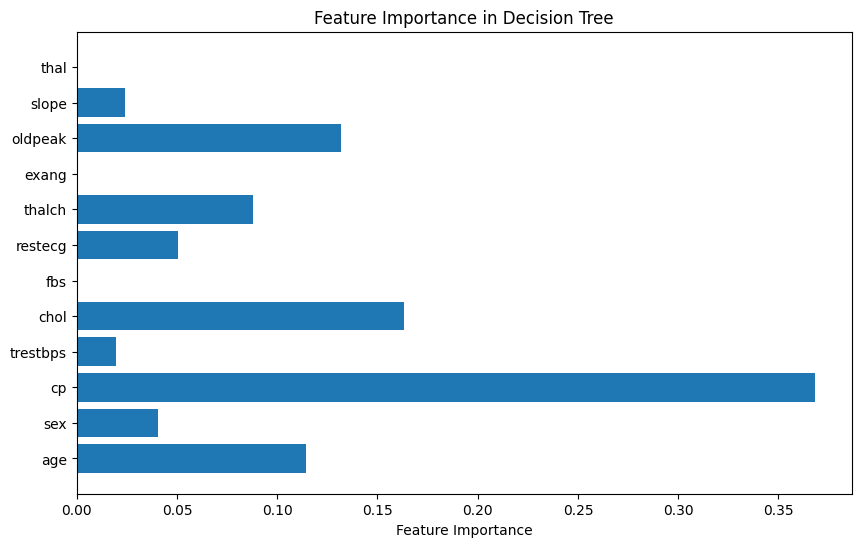

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Assuming the best decision tree model (best_dt) and test data (X_test, y_test) are already defined from previous step

# Predict on test set
y_pred = best_dt.predict(X_test)
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Decision Tree Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Visualize the Decision Tree structure
plt.figure(figsize=(20,12))
plot_tree(best_dt, filled=True, feature_names=X_test.columns, class_names=['No Disease','Disease'], rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

# Plot feature importance
feature_importance = best_dt.feature_importances_
features = X_test.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()
